In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import diffimTests as dit

import warnings
warnings.filterwarnings('ignore')

First set a baseline for detection of 5-sigma sources on varying static source density and without re-fitting PSFS.

Note this is for `templateNoNoise=True` and `skyLimited=True` !!!

Note that for better PSF fitting (and more realism), we make sure that `avoidAllOverlaps=0` instead of previous runs which had `avoidAllOverlaps=15`.

In [2]:
n_runs = 10
ns = np.append(np.insert(np.arange(500, 5001, 250), 0, [50, 100, 250]), [7500, 10000, 15000])
testResults1 = dit.multi.runMultiDiffimTests(varSourceFlux=620., 
                                             n_varSources=50, nStaticSources=ns,
                                             #templateNoNoise=True, skyLimited=True,
                                             sky=[30., 300.],
                                             avoidAllOverlaps=0.,
                                             n_runs=n_runs, remeasurePsfs=[False, False])

RUNNING: 250
CORES: 4


[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   37.2s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:  3.4min


Weights sum to zero, can't be normalized


[Parallel(n_jobs=4)]: Done 213 tasks      | elapsed:  8.8min


Weights sum to zero, can't be normalized
Weights sum to zero, can't be normalized
Weights sum to zero, can't be normalized
Weights sum to zero, can't be normalized


[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 11.1min finished


In [3]:
import pandas as pd
methods = ['ALstack', 'ZOGY', 'SZOGY', 'ALstack_decorr']

tr1 = [tr for tr in testResults1 if tr['result'] is not None]
print len(testResults1), len(tr1)

250 250


In [9]:
TP1 = []; FP1 = []; FN1 = []
for i, tr in enumerate(tr1):    
    FN = {key: tr['result'][key]['FN'] for key in methods}
    FN['n_sources'] = tr['n_sources']
    FN1.append(pd.DataFrame(FN, index=[0]))

    TP = {key: tr['result'][key]['TP'] for key in methods}
    TP['n_sources'] = tr['n_sources']
    TP1.append(pd.DataFrame(TP, index=[0]))

    FP = {key: tr['result'][key]['FP'] for key in methods}
    FP['n_sources'] = tr['n_sources']
    FP1.append(pd.DataFrame(FP, index=[0]))

FN1 = pd.concat(FN1, axis=0).groupby('n_sources').median()
TP1 = pd.concat(TP1, axis=0).groupby('n_sources').median()
FP1 = pd.concat(FP1, axis=0).groupby('n_sources').median()
dit.sizeme(FN1.head())

,ALstack,ALstack_decorr,SZOGY,ZOGY
n_sources,,,,
50,32.0,33.5,36.5,33.0
100,33.0,36.5,38.0,36.0
250,34.5,37.5,37.5,36.5
500,35.0,35.5,38.5,35.5
750,35.0,37.0,38.0,36.0


(0, 6000)

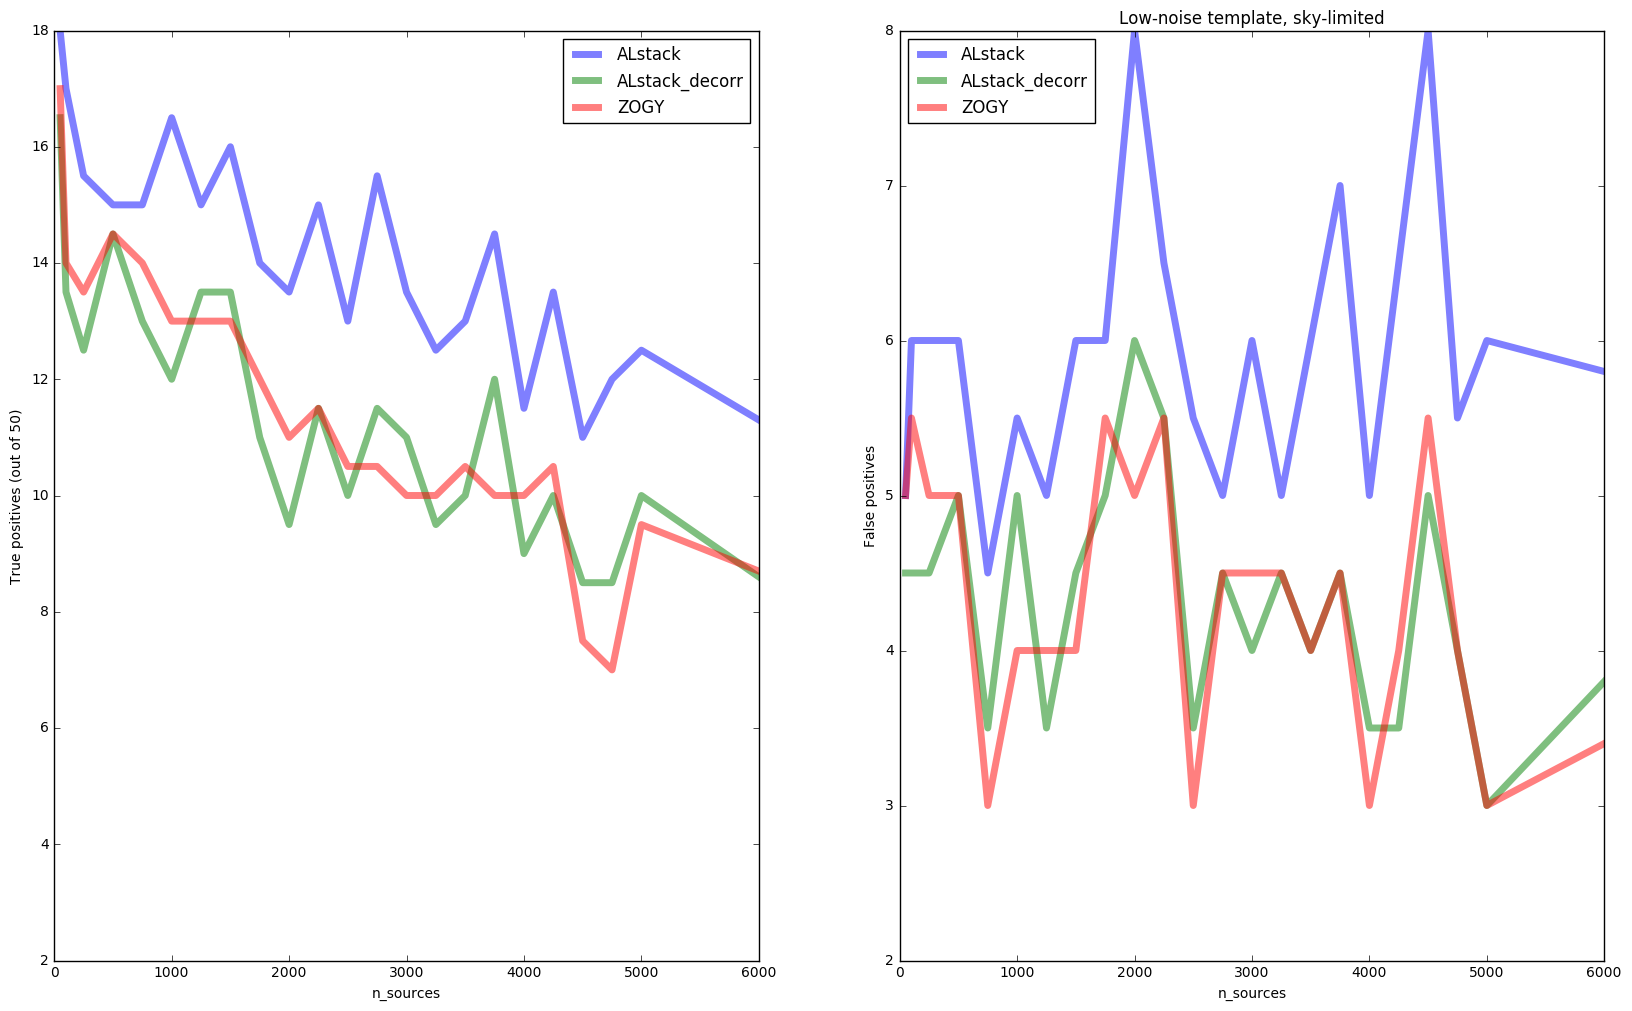

In [11]:
plt.subplots(3, 2, figsize=(20, 12))
ax = plt.subplot(121)
TP1.drop('SZOGY', 1).reset_index().plot(x='n_sources', alpha=0.5, lw=5, ax=ax)
ax.set_ylabel('True positives (out of 50)')
ax.set_xlim(0, 6000)
ax = plt.subplot(122)    
FP1.drop('SZOGY', 1).reset_index().plot(x='n_sources', alpha=0.5, lw=5, ax=ax)
ax.set_ylabel('False positives')
ax.set_title('Low-noise template, sky-limited')
ax.set_xlim(0, 6000)

Now do it after re-fitting the PSF in the science image

In [12]:
n_runs = 10
ns = np.append(np.insert(np.arange(500, 5001, 250), 0, [50, 100, 250]), [7500, 10000, 15000])
testResults2 = dit.multi.runMultiDiffimTests(varSourceFlux=620., 
                                             n_varSources=50, nStaticSources=ns,
                                             #templateNoNoise=True, skyLimited=True,
                                             sky=[30., 300.],
                                             avoidAllOverlaps=0.,
                                             n_runs=n_runs, remeasurePsfs=[True, True])

RUNNING: 250
CORES: 4
N SOURCES: 49
N SOURCES: 49
N SOURCES: 49
N SOURCES: 49

  File "src/PsfexPsf.cc", line 192, in virtual std::shared_ptr<afw::detection::Psf::Image> lsst::meas::extensions::psfex::PsfexPsf::_doComputeImage(const afw::geom::Point2D &, const afw::image::Color &, const afw::geom::Point2D &) const
    Only spatial variation (ndim == 2) is supported; saw 0 {0}
lsst::pex::exceptions::InvalidParameterError: 'Only spatial variation (ndim == 2) is supported; saw 0'

HERE1: 'NoneType' object has no attribute 'shape'
N SOURCES: 35
N SOURCES: 32
N SOURCES: 49
N SOURCES: 49
N SOURCES: 48
N SOURCES: 46
N SOURCES: 45
N SOURCES: 48

  File "src/PsfexPsf.cc", line 192, in virtual std::shared_ptr<afw::detection::Psf::Image> lsst::meas::extensions::psfex::PsfexPsf::_doComputeImage(const afw::geom::Point2D &, const afw::image::Color &, const afw::geom::Point2D &) const
    Only spatial variation (ndim == 2) is supported; saw 0 {0}
lsst::pex::exceptions::InvalidParameterError: 'Only sp

[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   58.8s



  File "src/PsfexPsf.cc", line 192, in virtual std::shared_ptr<afw::detection::Psf::Image> lsst::meas::extensions::psfex::PsfexPsf::_doComputeImage(const afw::geom::Point2D &, const afw::image::Color &, const afw::geom::Point2D &) const
    Only spatial variation (ndim == 2) is supported; saw 0 {0}
lsst::pex::exceptions::InvalidParameterError: 'Only spatial variation (ndim == 2) is supported; saw 0'

HERE1: 'NoneType' object has no attribute 'shape'
N SOURCES: 87
N SOURCES: 39

  File "src/PsfexPsf.cc", line 192, in virtual std::shared_ptr<afw::detection::Psf::Image> lsst::meas::extensions::psfex::PsfexPsf::_doComputeImage(const afw::geom::Point2D &, const afw::image::Color &, const afw::geom::Point2D &) const
    Only spatial variation (ndim == 2) is supported; saw 0 {0}
lsst::pex::exceptions::InvalidParameterError: 'Only spatial variation (ndim == 2) is supported; saw 0'

HERE2: 'NoneType' object has no attribute 'shape'
N SOURCES: 91
N SOURCES: 184
N SOURCES: 48
N SOURCES: 196
N SO

[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:  7.7min


N SOURCES: 350
N SOURCES: 457
N SOURCES: 483
N SOURCES: 314
N SOURCES: 483
N SOURCES: 320
N SOURCES: 328
N SOURCES: 447
N SOURCES: 349
N SOURCES: 426
N SOURCES: 491
N SOURCES: 452
N SOURCES: 370
N SOURCES: 314
N SOURCES: 328
N SOURCES: 474
N SOURCES: 361
N SOURCES: 469
N SOURCES: 458
N SOURCES: 456
N SOURCES: 352
N SOURCES: 376
N SOURCES: 362
N SOURCES: 453
N SOURCES: 356
N SOURCES: 493
N SOURCES: 433
N SOURCES: 450
N SOURCES: 328
N SOURCES: 366
N SOURCES: 391
N SOURCES: 463
N SOURCES: 348
N SOURCES: 444
N SOURCES: 487
N SOURCES: 520
N SOURCES: 357
N SOURCES: 365
N SOURCES: 368
N SOURCES: 473
N SOURCES: 350
N SOURCES: 492
N SOURCES: 471
N SOURCES: 482
N SOURCES: 357
N SOURCES: 358
N SOURCES: 360
N SOURCES: 488
N SOURCES: 356
N SOURCES: 499
N SOURCES: 465
N SOURCES: 467
N SOURCES: 361
N SOURCES: 359
N SOURCES: 387
N SOURCES: 534
N SOURCES: 390
N SOURCES: 547
N SOURCES: 527
N SOURCES: 522
N SOURCES: 383
N SOURCES: 364
N SOURCES: 371
N SOURCES: 526
N SOURCES: 369
N SOURCES: 510
N SOURCES:

[Parallel(n_jobs=4)]: Done 213 tasks      | elapsed: 24.3min


N SOURCES: 408
N SOURCES: 454
N SOURCES: 578
N SOURCES: 456
N SOURCES: 632
N SOURCES: 651
N SOURCES: 568
N SOURCES: 442
N SOURCES: 426
N SOURCES: 453
N SOURCES: 387
N SOURCES: 688
N SOURCES: 453
N SOURCES: 410
N SOURCES: 414
N SOURCES: 661
Weights sum to zero, can't be normalized
N SOURCES: 701
N SOURCES: 675
N SOURCES: 416
N SOURCES: 697
Weights sum to zero, can't be normalized
N SOURCES: 412
N SOURCES: 421
N SOURCES: 448
N SOURCES: 666
N SOURCES: 654
N SOURCES: 643
N SOURCES: 451
N SOURCES: 708
N SOURCES: 430
Weights sum to zero, can't be normalized
N SOURCES: 300
N SOURCES: 660
N SOURCES: 346
N SOURCES: 657
N SOURCES: 686
N SOURCES: 312
N SOURCES: 648
N SOURCES: 316
N SOURCES: 339
N SOURCES: 321
N SOURCES: 692
N SOURCES: 610
N SOURCES: 659
N SOURCES: 315
N SOURCES: 641
Weights sum to zero, can't be normalized
N SOURCES: 307
N SOURCES: 305
N SOURCES: 297
N SOURCES: 684
N SOURCES: 675
N SOURCES: 669
N SOURCES: 242
N SOURCES: 549
N SOURCES: 218
N SOURCES: 220
N SOURCES: 547
N SOURCES: 

[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 29.9min finished


In [11]:
dit.dumpObjects((testResults1, testResults2), "tmp5_pkl")

In [7]:
testResults1, testResults2 = dit.loadObjects('tmp5_pkl')

In [13]:
import pandas as pd
methods = ['ALstack', 'ZOGY', 'SZOGY', 'ALstack_decorr']

tr2 = [tr for tr in testResults2 if tr['result'] is not None]
print len(testResults2), len(tr2)

250 250


In [14]:
TP1 = []; FP1 = []; FN1 = []
for i, tr in enumerate(tr2):    
    rms = tr['psfInfo']['normedRms2']
    if rms is None:
        rms = np.nan

    FN = {key: tr['result'][key]['FN'] for key in methods}
    FN['n_sources'] = tr['n_sources']
    FN['normedRms2'] = rms
    FN1.append(pd.DataFrame(FN, index=[0]))

    TP = {key: tr['result'][key]['TP'] for key in methods}
    TP['n_sources'] = tr['n_sources']
    TP['normedRms2'] = rms
    TP1.append(pd.DataFrame(TP, index=[0]))

    FP = {key: tr['result'][key]['FP'] for key in methods}
    FP['n_sources'] = tr['n_sources']
    FP['normedRms2'] = rms
    FP1.append(pd.DataFrame(FP, index=[0]))

FN1 = pd.concat(FN1, axis=0).groupby('n_sources').median()
TP1 = pd.concat(TP1, axis=0).groupby('n_sources').median()
FP1 = pd.concat(FP1, axis=0).groupby('n_sources').median()
dit.sizeme(FN1.head())

,ALstack,ALstack_decorr,SZOGY,ZOGY,normedRms2
n_sources,,,,,
50,32.0,33.5,38.5,34.0,0.015004
100,33.5,36.5,40.0,35.0,0.012417
250,34.5,37.5,41.0,36.5,0.010186
500,35.0,36.0,39.5,36.0,0.008228
750,35.0,37.5,42.0,37.5,0.007213


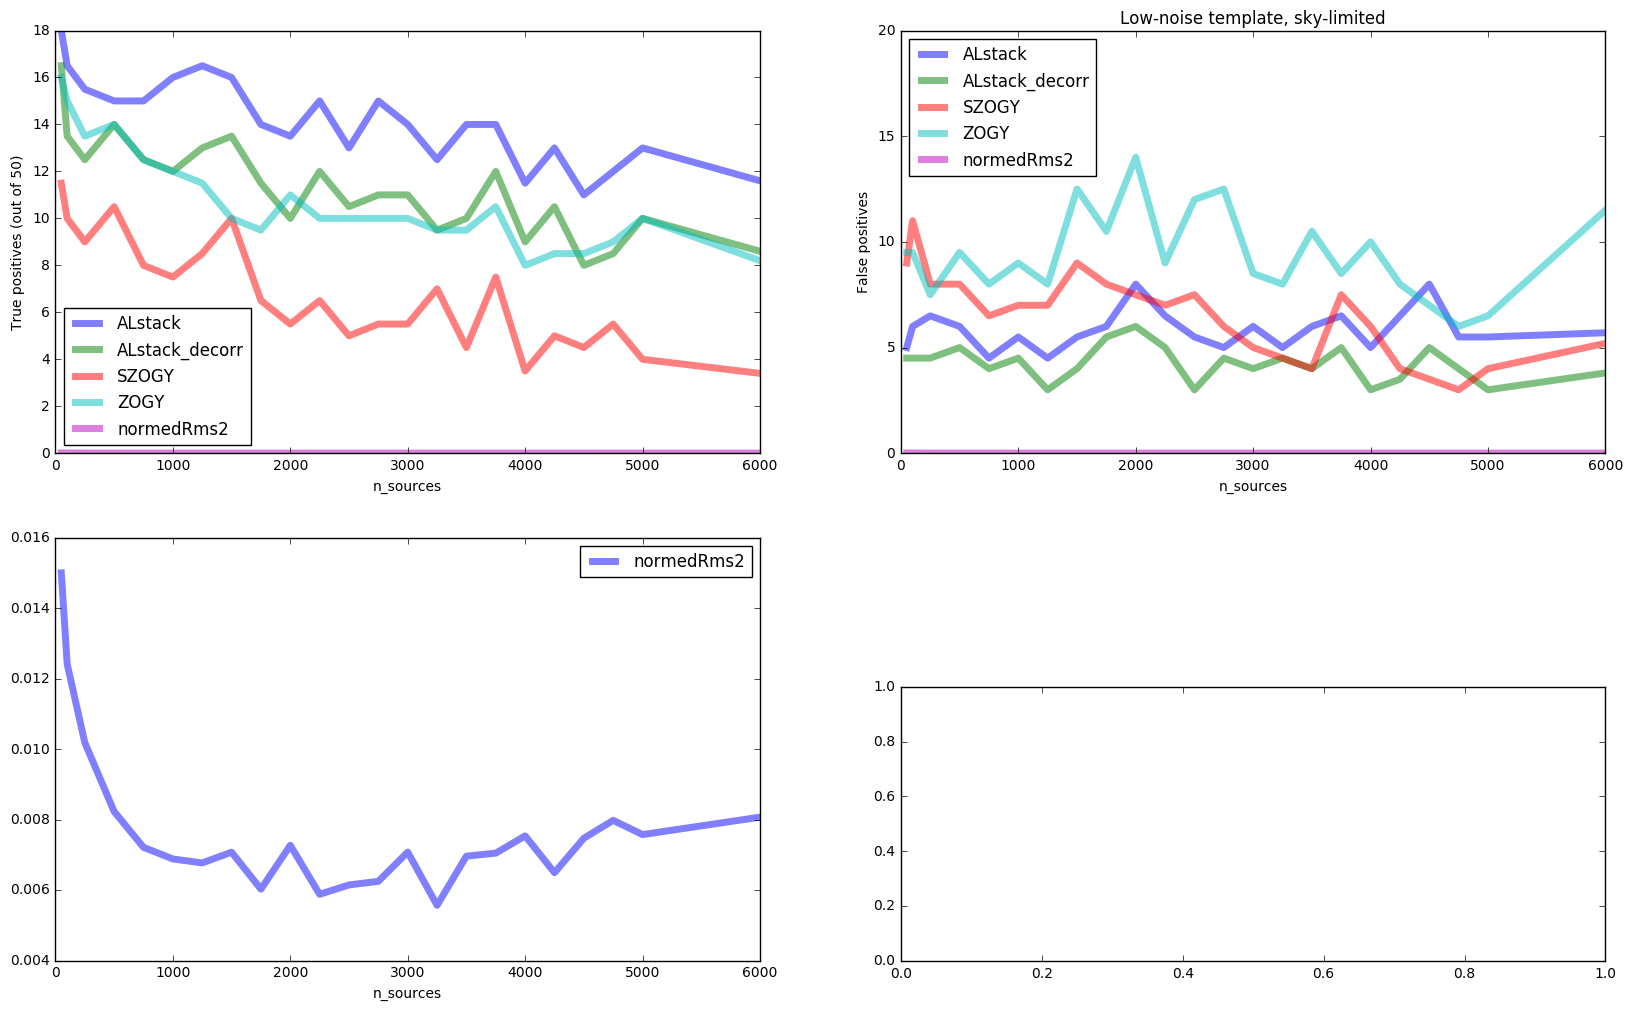

In [16]:
plt.subplots(3, 2, figsize=(20, 12))
ax = plt.subplot(221)    
TP1.reset_index().plot(x='n_sources', alpha=0.5, lw=5, ax=ax)
ax.set_ylabel('True positives (out of 50)')
ax.set_xlim(0, 6000)
ax = plt.subplot(222)    
FP1.reset_index().plot(x='n_sources', alpha=0.5, lw=5, ax=ax)
ax.set_ylabel('False positives')
ax.set_title('Low-noise template, sky-limited')
ax.set_xlim(0, 6000)
ax.set_ylim(0, 20)

ax = plt.subplot(223)    
FP1[['normedRms2']].reset_index().plot(x='n_sources', alpha=0.5, lw=5, ax=ax)
ax.set_xlim(0, 6000);